### Data Argumentaion - Reading the images from our local folder.

To avoid overfitting and create a larger dataset from a smaller one we can use a technique called ``data augmentation``. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

```python

tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
```

### Imports

In [14]:
import tensorflow as tf
import os, shutil, random
import tensorflow.keras as keras
import matplotlib.pyplot as plt

> When dealing with this our folders has different `2` stuctures that they should have. For example, let's say we have images of bees and ant's so there are `2` classes, and we shoud come up with `3` subsets which are `training`, `testing`, and `validation`. These folders especially the `train` and `validation` must have `2` subfolders in them which are `ants` and `bees`. We can also do this to the `test` folder, but the `test` data normally dont have `labels` so it does not mater if we have subsets int it.

#### Folders Structure 1 `(unlabeled test-set)`
````
    data
        train
            bees
                - bee1.png
                - bee2.png
                ...
            ants
                - ant1.png
                ...
        validation
            bees
                - bee1.png
                - bee2.png
                ...
            ants
                - ant1.png
                ...
    test
        bee1.png
        ant1.png
        ...
````
#### Folders Structure 2 `(labeled test-set)`
````
    data
        train
            bees
                - bee1.png
                - bee2.png
                ...
            ants
                - ant1.png
                ...
        validation
            bees
                - bee1.png
                - bee2.png
                ...
            ants
                - ant1.png
                ...
         test
                 bees
                - bee1.png
                - bee2.png
                ...
            ants
                - ant1.png
                ...
````

**Note** - The only difference is on the `test` sub-set in the event that we want our test data to have labels we use the method 2 otherwise we use method 1. And when using method 1 the test folder must be in the `root` folder and the following code will read the images of the test set.

```python
test_batches = test_gen.flow_from_directory(
    '.', # root dir
    target_size=(256, 256),
)
```

> Programatically, Grouping images.

In [17]:
valid_path_bee = "bees_v_ant/validation/bee"
test_path_bee = "bees_v_ant/test/bee"
train_path_bee = "bees_v_ant/train/bee"

valid_path_ant = "bees_v_ant/validation/ant"
test_path_ant = "bees_v_ant/test/ant"
train_path_ant = "bees_v_ant/train/ant"

if not os.path.exists(valid_path_bee):
    os.makedirs(valid_path_bee)
if not os.path.exists(train_path_bee):
    os.makedirs(train_path_bee)
if not os.path.exists(test_path_bee):
    os.makedirs(test_path_bee)
    
if not os.path.exists(valid_path_ant):
    os.makedirs(valid_path_ant)
if not os.path.exists(train_path_ant):
    os.makedirs(train_path_ant)
if not os.path.exists(test_path_ant):
    os.makedirs(test_path_ant)  

print("Done.")

Done.


> Moving `images` around using `shutil`

In [18]:
training_size = 10
test_size = 4
valid_size = 6

base_dir_bees = "data/bees"
base_dir_ants = 'data/ant'

In [19]:
bees_images = os.listdir(base_dir_bees)
ants_images = os.listdir(base_dir_ants)

In [20]:
for _ in range(training_size):
    ants_images = os.listdir(base_dir_ants)
    random.shuffle(ants_images)
    shutil.move(os.path.join(base_dir_ants, ants_images[0]) , train_path_ant)
for ___ in range(valid_size):
    ants_images = os.listdir(base_dir_ants)
    random.shuffle(ants_images)
    shutil.move(os.path.join(base_dir_ants, ants_images[0]) , valid_path_ant)
for __ in range(test_size):
    ants_images = os.listdir(base_dir_ants)
    random.shuffle(ants_images)
    shutil.move(os.path.join(base_dir_ants, ants_images[0]) , test_path_ant)
    
for ___i in range(training_size):
    bees_images = os.listdir(base_dir_bees)
    random.shuffle(bees_images)
    shutil.move(os.path.join(base_dir_bees, bees_images[0]) , train_path_bee)
for __i in range(valid_size):
    bees_images = os.listdir(base_dir_bees)
    random.shuffle(bees_images)
    shutil.move(os.path.join(base_dir_bees, bees_images[0]) , valid_path_bee)
for _i in range(test_size):
    bees_images = os.listdir(base_dir_bees)
    random.shuffle(bees_images)
    shutil.move(os.path.join(base_dir_bees, bees_images[0]) , test_path_bee)

print("Done")

Done


> Creating `ImageDataGenerator`'s  for each subset

In [28]:
train_path = "bees_v_ant/train"
test_path = "bees_v_ant/test"
valid_path = "bees_v_ant/validation"

train_gen = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

print("Done")

Done


> Generating `batches` for each subset.

In [24]:
class_names = ["ant", "bee"]

In [94]:
train_batches = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=2,
    shuffle=True,
    color_mode="rgb",
    classes=class_names  
)
test_batches = test_gen.flow_from_directory(
    '.',
    target_size=(224, 224),
    classes=['test'] 
)
valid_batches = valid_gen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=2,
    shuffle=True,
    color_mode="rgb",
    classes=class_names  
)

print("Done")

Found 20 images belonging to 2 classes.
Found 8 images belonging to 1 classes.
Found 12 images belonging to 2 classes.
Done


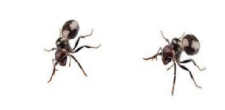

In [95]:
train_test = train_batches[4][0]
def display_images(images_and_classes, labels=[], cols=5):
    rows = 3
    fig = plt.figure(figsize = (10,10))
    fig.set_size_inches(cols * 2, rows * 2)
    for i, image in enumerate(images_and_classes):
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.imshow(image)
display_images(train_test)

In [56]:
train_test[0].shape

(224, 224, 3)

### Create a simple model

In [96]:
model = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    keras.layers.Conv2D(64, (2,2), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (2,2), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (2,2), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (2,2), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])
model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits=False), # because we applied softmax
    metrics = ['acc'],
    optimizer = 'adam'
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 223, 223, 64)      832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 110, 110, 32)      8224      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)       

In [97]:
history = model.fit(train_batches, validation_data=valid_batches, epochs=10)

Epoch 1/10
10/10 [==============================] - 8s 291ms/step - loss: 1.5602 - acc: 0.5932 - val_loss: 0.6833 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 275ms/step - loss: 0.6575 - acc: 0.5136 - val_loss: 0.4264 - val_acc: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 261ms/step - loss: 0.3414 - acc: 1.0000 - val_loss: 0.2263 - val_acc: 1.0000
Epoch 4/10
10/10 [==============================] - 3s 259ms/step - loss: 0.1633 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 2s 249ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 5.6545e-04 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 2s 252ms/step - loss: 2.0873e-04 - acc: 1.0000 - val_loss: 3.4811e-04 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 3s 259ms/step - loss: 2.3840e-05 - acc: 1.0000 - val_loss: 4.2940e-05 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 3s 2

> Plottin `model` history for `each` epoch

In [77]:
import pandas as pd
import numpy as np

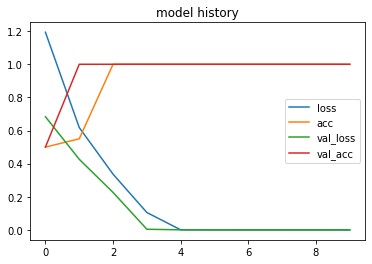

In [98]:
pd.DataFrame(history.history).plot(title="model history")
plt.show()

Evaluating the ``model``

In [99]:
model.evaluate(test_batches)

1/1 [==============================] - 0s 248ms/step - loss: 14.4181 - acc: 0.5000


[14.418128967285156, 0.5]

> Making ``predictions``

In [108]:
predictions = tf.argmax(model.predict(test_batches), axis=1)
predictions

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)>

In [106]:
test_batches[0][0]

(8, 224, 224, 3)

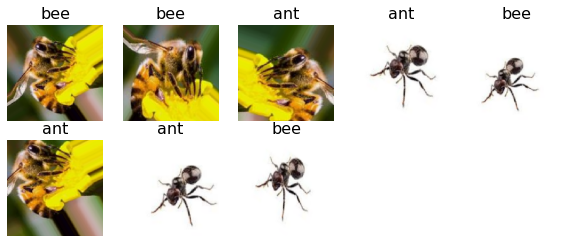

In [109]:
def display_images(images_and_classes, labels, cols=5):
  rows = 3
  fig = plt.figure()
  fig.set_size_inches(cols * 2, rows * 2)
  for i, (image, label) in enumerate(zip(images_and_classes, labels)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(class_names[label], fontsize=16)

display_images(test_batches[0][0][:], predictions)